In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Install dependencies

In [5]:
!pip install langchain-experimental
!pip install -U langchain-huggingface

  Using cached langchain_experimental-0.3.4-py3-none-any.whl.metadata (1.7 kB)
  Using cached langchain_community-0.3.24-py3-none-any.whl.metadata (2.5 kB)
  Using cached dataclasses_json-0.6.7-py3-none-any.whl.metadata (25 kB)
  Using cached pydantic_settings-2.9.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached httpx_sse-0.4.0-py3-none-any.whl.metadata (9.0 kB)
  Using cached marshmallow-3.26.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached typing_inspect-0.9.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached python_dotenv-1.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached mypy_extensions-1.1.0-py3-none-any.whl.metadata (1.1 kB)
Using cached langchain_experimental-0.3.4-py3-none-any.whl (209 kB)
Using cached langchain_community-0.3.24-py3-none-any.whl (2.5 MB)
Using cached dataclasses_json-0.6.7-py3-none-any.whl (28 kB)
Using cached httpx_sse-0.4.0-py3-none-any.whl (7.8 kB)
Using cached pydantic_settings-2.9.1-py3-none-any.whl (44 kB)
Using cached marshmallow-3.26.1-py3-non

In [26]:
!pip install sentence-transformers

# Semantic chunking with Langchain's SemanticChunker

Load embedding model

In [30]:
from sentence_transformers import SentenceTransformer

model_name = "Lajavaness/bilingual-embedding-large"
st_model = SentenceTransformer(model_name, trust_remote_code=True)

In [10]:
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_experimental.text_splitter import SemanticChunker

model_name = "Lajavaness/bilingual-embedding-large"
# st_model = SentenceTransformer(model_name)
embeddings = HuggingFaceEmbeddings(model_name=model_name,model_kwargs={"trust_remote_code": True})

config.py:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/dangvantuan/bilingual_impl:
- config.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling.py:   0%|          | 0.00/72.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/dangvantuan/bilingual_impl:
- modeling.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config-checkpoint.json:   0%|          | 0.00/297 [00:00<?, ?B/s]

Configurate chunker

In [11]:
chunker = SemanticChunker(
    embeddings=embeddings,
    breakpoint_threshold_type="percentile",
    breakpoint_threshold_amount=90 # could require tuning
)

Perform chunking

In [12]:
import json
from tqdm import tqdm

In [13]:
%cd /content/drive/MyDrive/[EVENTA 2025] Event-Enriched Image Captioning

/content/drive/.shortcut-targets-by-id/1NmDTfYSFGM7rF-TUiX3a_xP7ucqhpBD1/[EVENTA 2025] Event-Enriched Image Captioning


In [14]:
DATABASE_PATH = "filtered_database.json"

In [15]:
def read_articles(DATABASE_PATH):
  with open(DATABASE_PATH,'r') as f:
    db = json.load(f)
  return db

In [16]:
def write_chunks(OUTPUT_PATH, articles_with_chunks):
  with open(OUTPUT_PATH, 'w', encoding="utf-8") as f:
    json.dump(articles_with_chunks, f, ensure_ascii=False, indent=2)


In [17]:
def split_chunks(text):
  return chunker.split_text(text)

In [18]:
db = read_articles(DATABASE_PATH)

Note: New start index = old end index

In [19]:
START_INDEX = 100
END_INDEX = 1000

In [20]:
OUTPUT_PATH = f"chunked_articles/chunked_articles_{START_INDEX}_{END_INDEX}.json"

In [21]:
db_items = list(db.items())
articles_to_process = db_items[START_INDEX:END_INDEX]
articles_with_chunks = []
for aid, meta in tqdm(articles_to_process, desc="Chunking articles"):
    text = meta.get("content", "")
    chunks = split_chunks(text)
    articles_with_chunks.append({
        "retrieved_article_id": aid,
        "chunks": [
            {"cid": idx, "chunk_content": c.strip()}
            for idx, c in enumerate(chunks, start=1)
        ]
    })

Chunking articles: 100%|██████████| 900/900 [28:19<00:00,  1.89s/it]


In [22]:
write_chunks(OUTPUT_PATH, articles_with_chunks)

In [23]:
total_chunks = sum(len(article["chunks"]) for article in articles_with_chunks)
print(f"✅ {len(articles_with_chunks)} articles split into {total_chunks} total chunks.")

✅ 900 articles split into 5587 total chunks.


# Test with one article

In [29]:
content = "The pandemic thrust the working world into a new reality in March 2020 as offices closed and millions of people were forced to learn how to do their jobs from home.Two years later, employers and workers are still adapting to a new normal and trying to figure out what the future of work might look like.Some companies are determined to return to the way things were and get everyone back into the office. And some have embraced remote work, allowing employees to work from home full time or part of the time.But many workers are deciding to chart their own course. Some have found that they love working from home and never want to step foot in an office again. Others are itching to go back -- missing the in-person collaboration and socializing with peers. And some want a little bit of both worlds.  That has prompted many workers to rethink or even switch careers and make some other big changes. Here's a look at how the pandemic reshaped people's careers in ways they never expected: Read MoreMoving cross country to start a new lifeAfter her job went fully remote, Chelsea Pruitt decided to move from California to Alabama. Chelsea Pruitt, 31, has lived in California for nearly her entire life. Now, she's headed to Alabama. Prior to the pandemic, Pruitt had thought about moving, but it wasn't until she started working remotely that the decision became a lot easier to make. \"I feel like my chapter in life in San Francisco is changing,\" she said. \"My perspective on things is changing. The things I want out of life  are changing.\"Pruitt started working for long-term housing rental company Zeus Living in January 2020, right before the pandemic hit the US. At the time, she was going into the office five days a week. But once the pandemic began to shut things down in March, she started working remotely full time. That was just what Pruitt needed to make her decision. She had visited a co-worker in Birmingham, Alabama, a few times and decided that was the place she wanted to live.\"I love the vibe of the city, the change, and I loved [that] it's more leisurely, slow and less stressful and obviously a lot more affordable [than San Francisco], which I am really excited about.\"The high cost of living in San Francisco meant she always had to have roommates. \"In San Francisco, I don't see myself being able to own a home unless I am married and have a dual income,\" she said. But since her pay will remain the same after the move to Birmingham and the cost of living will be significantly less, she'll be able to save more, and hopefully buy a home of her own and pay down her student loans.\"I am looking forward to that mental relief knowing that my cost of living is lower and I can save more,\" she said.Finally taking the leapCarlos Ortiz started his own consulting business during the pandemic. Carlos Ortiz had been working as an inspector with the US Food and Drug Administration (FDA) for 19 years before the pandemic hit. He had been considering leaving his job for a few years, but was nervous about making such a big change.  A lot of my friends are entrepreneurs and business people and I've never worked in the private industry ... so I decided, let me give it a shot\" Carlos Ortiz\"I started re-evaluating life and opportunities,\" Ortiz, 48, said of that time. \"[But] I was very comfortable getting a paycheck every two weeks.\"But in April 2020, when businesses were shutting their offices down across the country, he realized he wanted more control over his life -- especially when it came to his work. So he began planning the launch of his own business.\"A lot of my friends are entrepreneurs and business people and I've never worked in the private industry ... so I decided, let me give it a shot,\" he said.At the start of 2021, he quit his full-time job and launched a consulting business to advise companies on how to comply with government regulations. To help provide some financial cushion as he launched the new venture, Ortiz had been saving up unused leave, which he got paid out for when he left his job.At first, \"it was very scary,\" he said. Now, he's making slightly less than he was at his old job, but he's only working 20 hours a week. Ortiz said he also has more control over his schedule, and since most of his business is done over the phone and on video calls, he's been able to work from anywhere. So far, he's worked from Geneva, Switzerland, San Antonio and Anchorage, Alaska.\"I am getting back into my art and reading a lot more ... and exercising a lot more. And I am doing my chores as I've always done, but now I am just not exhausted.\"Enjoying the hybrid lifeAfter working from home for two years, John Pearson missed the collaboration and socialization that happens in the office.John Pearson used to have a hard deadline of 6:00 a.m. in order to be out of his driveway and on his way to work each morning.\"Otherwise, the commute goes from an hour to something much worse,\" said Pearson, 55, who is a senior vice president at PTC, an industrial software company in Boston. But for the past two years, his commute has been a quick walk down the hall to his home office. I can get through more complex problem solving much faster in a room with two or three people and a whiteboard than I can through Zoom\" John PearsonAt first, he said he was more productive and less distracted when working from home. But now that he has periodically started going into the office, he realizes there are some advantages to in-person work. \"I can get through more complex problem solving much faster in a room with two or three people and a whiteboard than I can through Zoom,\" he said.He also realized he missed talking to people in the office about simple things, like their kids or what they've been watching on TV. \"When you are jumping from 30-minute call to 30-minute call on video, you just don't do that as much.\"His company plans to offer a flexible model to its employees -- something Pearson prefers. His goal is to be in the office two to three days a week. And as much as he didn't like the commute, he started to realize the role it played. \"It really is a firm break in which you walk away and you close your laptop.\"The WFH convertRashmi Bhankhede used to prefer being in the office five days a week. Now she hopes to work remotely full-time.Rashmi Bhankhede never really liked the idea of working from home. \"Before the pandemic...I definitely preferred working face-to-face in this open-office environment,\" she said. \"I thought it was the most productive way for everyone.\" As a senior manager of software engineering at Capital One, she manages two teams. She used to want her teams to come into the office to collaborate, discuss projects, hold feedback sessions and interact on a more social level. But the pandemic has changed her approach. It doesn't matter where you are. If you have good processes to connect with your peers and [direct] reports, working remote can be very productive\"  Rashmi Bhankhede After two years of working from home, she's hoping to make remote work permanent. Capital One has said it will be on a hybrid schedule when it reopens its offices. \"It doesn't matter where you are. If you have good processes to connect with your peers and [direct] reports, working remote can be very productive,\" said Bhankhede, 43.She added that the flexibility helps her manage her time better and that her team has become closer -- even though they haven't seen each other in person for two years. To better define the boundary between work and her personal life, Bhankhede gets dressed in her work clothes every morning and changes at the end of the day, followed by a relaxing activity like a walk. Working from home has also meant spending more time with her two sons and learning new hobbies since she no longer has to commute. \"I started growing peppers and tomatoes and cucumbers ... and got back into sewing,\" she said. \"I am still not good at it.\"Turning a hobby into a new career Cody Irion went back to school and switched careers during the pandemic.The pandemic hit right as Cody Irion's busy season was about to start. In 2020, he owned a horse transportation business in North Carolina. Typically, April through August were his most lucrative months, but when stay-at-home orders started sweeping the US, he quickly decided to close his business, sell the equipment and go back to school to get a degree in computer science. \"I had the choice of going into a massive amount of debt to keep going or change careers,\" said Irion, 35. \"I had started learning software development as a hobby and I really enjoyed it, so I didn't hesitate.\" He enrolled at the University of North Carolina at Chapel Hill, and since the majority of his classes have been virtual, he didn't have to move closer to campus until his final year, saving him a lot of money. He also believes he had more internship opportunities last summer since so many companies were still operating remotely.Irion is set to graduate this May and already has a job lined up at a financial services company. \"I had never even considered software engineering before I started it as a hobby because I grew up in Southern Illinois with race horses,\" he said. \"I knew nothing about the industry other than I liked computers and I started learning it and realized I was pretty good at it.\" Turning a side business into a full-time job Mabel Frias (pictured on the left with her sister) left her full-time job during the pandemic to fully commit to her side business, Luna Magic. Mabel Frias had been juggling two jobs at the beginning of the pandemic, but eventually had to make a decision: stay with the security and safety of her full-time job or pursue a riskier life as an entrepreneur. In March 2020, Frias was a little more than a year into working what she described as her \"dream job\" as director of digital merchandising at lingerie brand, Savage X Fenty. Meanwhile, she was also trying to grow Luna Magic, a beauty brand she launched with her sister in 2019.But as the pandemic forced many workers to do their jobs remotely, Luna Magic started gaining more traction and demanding more of her time. \"Because we were in a Zoom culture, people still wanted from the face up to look good. You still wanted to have a level of presentation while you are on the screen,\" Frias, 35, said. While working two jobs meant long hours during the week and weekends, Frias was nervous about leaving her full-time job and the financial security it brought. So she set certain benchmarks for Luna Magic to hit, including partnerships and business opportunities, before she could feel comfortable walking away. \"Part of the challenges a lot of entrepreneurs have is they jump to soon,\" she said. \"I don't like to have economic anxiety. I am also a mother and practical about these things.\"Soon enough, the company was meeting her goals. In 2020, Walmart.com started selling the company's products, which includes makeup and other cosmetics. And in 2021, Walmart and Target started carrying products in some stores, as well as online. \"I had to trust myself. I liked the idea of growing something from scratch,\" she said. In 2020, Frias applied to be on ABC's Shark Tank and was accepted. The show, which features entrepreneurs pitching their businesses to a panel of investors, aired in January 2021 -- the same day Frias quit her job. \"I love the magic of creating something out of nothing. I saw our company as we get to bring even more beauty into the world at a moment when people are looking for it,\" Frias said.Just graduated and can't wait to work in personRachel Zipfel started her new job working  fully remote, but hopes to eventually be in the office five days a week.Rachel Zipfel finished her college courses in the same place she started her first full-time job: in a room at her parents' house. Zipfel, 23, graduated from the University of Missouri, St. Louis in August 2021 with a degree in marketing. But because of the pandemic, her classes were remote for nearly her last two years of college. She's now working remotely for a digital marketing agency and has met her colleagues roughly five times in person. She feels like working from home has made it harder to get acclimated to the working world. When she first started, she found it challenging to learn the ropes. \"If you are trying to ask someone a question, you don't know what they are doing on the other side of the computer, so what could be a five-minute question in person [could turn] into maybe two hours of waiting for an answer,\" she said.Zipfel started going into the office about once a week in January, and said she feels more productive. She hopes to eventually be there five days a week. \"I've noticed a world of difference,\" she said. \"There are none of the distractions that are at home. It's so much easier to get work done. If the person is there that I need to talk to I can get my question answered in five seconds versus two hours. I love being in the office and I cant wait for it to be back open again.\"Quit a job that wanted him back in the office When Ryan Bernsten found out his employer wanted him to come back into the office, he found a new job.Ryan Bernsten had only been working at his new job as a copywriter for a few weeks in March 2020 when he was sent home to work remotely.At the time, he was worried about how it would work. \"Work from home? What would that even look like? I am going to miss out on all the social interaction -- I am new here,\" he recalled. If they aren't going to validate that I enjoy working from home, that I am better at home, and I enjoy my lifestyle at home, I need to find a job that will,\"Ryan BernstenBut eventually he adapted. Now two years later, he prefers remote work. Working from home, he said, enables him to be more productive and have a better work-life balance. So when he learned he was going to be required to return to the office a few days a week, he started looking for a new job that allowed him to stay remote. \"If they aren't going to validate that I enjoy working from home, that I am better at home, and I enjoy my lifestyle at home, I need to find a job that will,\" he said.  It took him less than a month to get a new, fully remote job.\"I never ever have to go back to the office,\" Bernsten, 29, said. \"You get to see people at their best. If we fly to San Francisco for a meeting, the adrenaline is there, we are excited to see people, we're going to make it count. But you don't have to see people every day ... when they have a cold, are in a bad mood or in a fight with their partner.\"  And not only did he get added flexibility, he also got a higher salary. \"I don't believe everyone needs to work from home,\" he said. \"But some people work better from home. I never wake up dreading work because I am in the comfort of my home.\" Correction: A previous version of this story incorrectly stated how long Mabel Frias worked at her previous employer."

chunks = chunker.split_text(content)
for idx, c in enumerate(chunks, start=1):
    print(f"Chunk {idx}: {c.strip()}\n")

Chunk 1: The pandemic thrust the working world into a new reality in March 2020 as offices closed and millions of people were forced to learn how to do their jobs from home.Two years later, employers and workers are still adapting to a new normal and trying to figure out what the future of work might look like.Some companies are determined to return to the way things were and get everyone back into the office. And some have embraced remote work, allowing employees to work from home full time or part of the time.But many workers are deciding to chart their own course. Some have found that they love working from home and never want to step foot in an office again. Others are itching to go back -- missing the in-person collaboration and socializing with peers. And some want a little bit of both worlds. That has prompted many workers to rethink or even switch careers and make some other big changes. Here's a look at how the pandemic reshaped people's careers in ways they never expected: Re

# Visualize similarity matrix


In [31]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download("punkt_tab")
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [33]:
def visualize_similarity_matrix(article):
  sentences = sent_tokenize(article)

  embeddings = st_model.encode(sentences)
  similarity_matrix = cosine_similarity(embeddings)

  # Visualize the similarity matrix
  plt.figure(figsize=(12, 10))
  sns.heatmap(similarity_matrix, xticklabels=1, yticklabels=1, cmap="viridis")
  plt.title("Sentence Similarity Matrix (Cosine Scores)")
  plt.xlabel("Sentence Index")
  plt.ylabel("Sentence Index")
  plt.show()

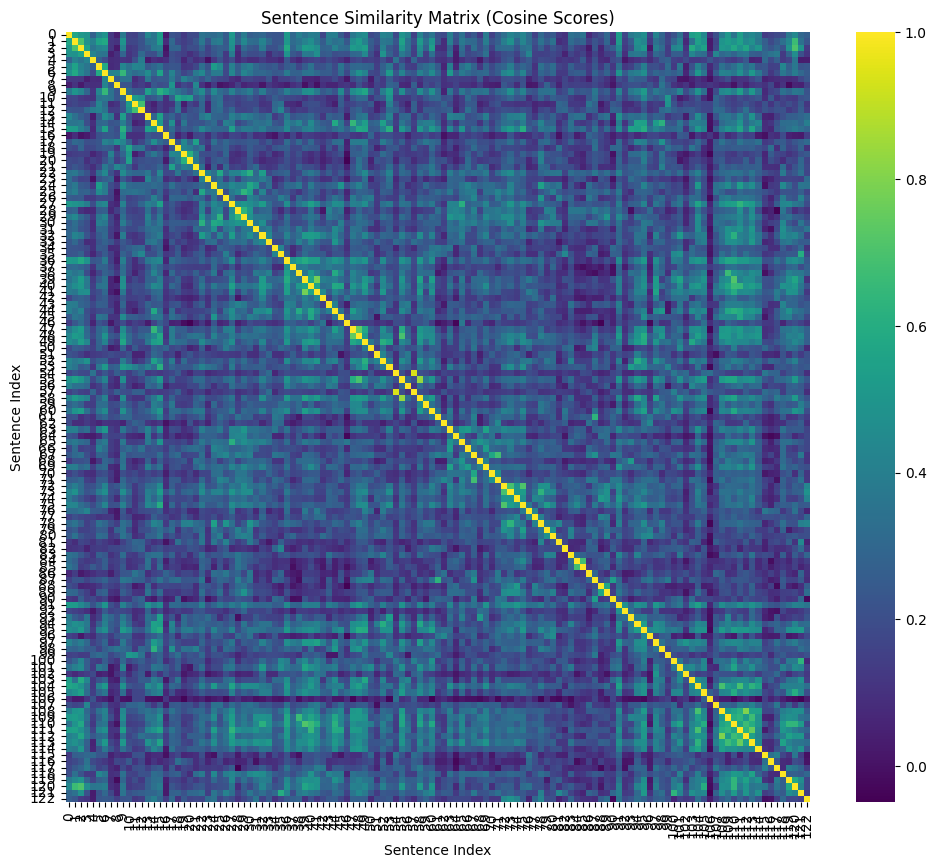

In [34]:
visualize_similarity_matrix(content)

In [40]:
%cd /content/drive/MyDrive/[EVENTA 2025] Event-Enriched Image Captioning/SSH

/content/drive/.shortcut-targets-by-id/1NmDTfYSFGM7rF-TUiX3a_xP7ucqhpBD1/[EVENTA 2025] Event-Enriched Image Captioning/SSH


In [41]:
!mkdir -p /root/.ssh
!cp deploy_key /root/.ssh/id_ed25519
!chmod 600 /root/.ssh/id_ed25519

# Add GitHub to known hosts (skip SSH prompt)
!ssh-keyscan github.com >> /root/.ssh/known_hosts

# github.com:22 SSH-2.0-4c545346
# github.com:22 SSH-2.0-4c545346
# github.com:22 SSH-2.0-4c545346
# github.com:22 SSH-2.0-4c545346
# github.com:22 SSH-2.0-4c545346


In [43]:
!git clone git@github.com:Noridom1/EVENTA2025-Event-Enriched-Image-Captioning.git /content/tmp

Cloning into '/content/tmp'...
remote: Enumerating objects: 204, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 204 (delta 11), reused 23 (delta 9), pack-reused 171 (from 3)
Receiving objects: 100% (204/204), 264.13 MiB | 21.92 MiB/s, done.
Resolving deltas: 100% (30/30), done.
Updating files: 100% (110/110), done.


In [44]:
%cd ..

/content/drive/.shortcut-targets-by-id/1NmDTfYSFGM7rF-TUiX3a_xP7ucqhpBD1/[EVENTA 2025] Event-Enriched Image Captioning


In [48]:
!pwd

/content/drive/.shortcut-targets-by-id/1NmDTfYSFGM7rF-TUiX3a_xP7ucqhpBD1/[EVENTA 2025] Event-Enriched Image Captioning


In [47]:
!cp /module linh tinh/semantic_chunk.ipynb /content/tmp

cp: cannot stat '/module': No such file or directory
cp: cannot stat 'linh': No such file or directory
cp: cannot stat 'tinh/semantic_chunk.ipynb': No such file or directory
